# Binary Classifier of likelihood of Surviving the Titanic

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data

In [2]:
training_data = pd.read_csv(r'titanic.csv')
training_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
#Only including the features/factors, excluding the "Name" column
X=training_data.iloc[:,[1,3,4,5,6,7]]
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [4]:
#Categorising and creating dummy variables
indicator=pd.get_dummies(training_data["Sex"])
indicator.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Final dataset with unnormalised data

In [5]:
#Final dataset with unnormalised data
X2=pd.concat([X,indicator],axis=1)
X3=X2.iloc[:,[0,2,3,4,5,6]]
Final=X3.rename(columns={'female':'Gender'})
Final.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [6]:
#The observed values for the "Survived" column
Output=training_data.iloc[:,0]

In [7]:
Combine=pd.concat([Final,Output],axis=1)
Combine.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender,Survived
0,3,22.0,1,0,7.2500,0,0
1,1,38.0,1,0,71.2833,1,1
2,3,26.0,0,0,7.9250,1,1
3,1,35.0,1,0,53.1000,1,1
4,3,35.0,0,0,8.0500,0,0


# Insights from the data

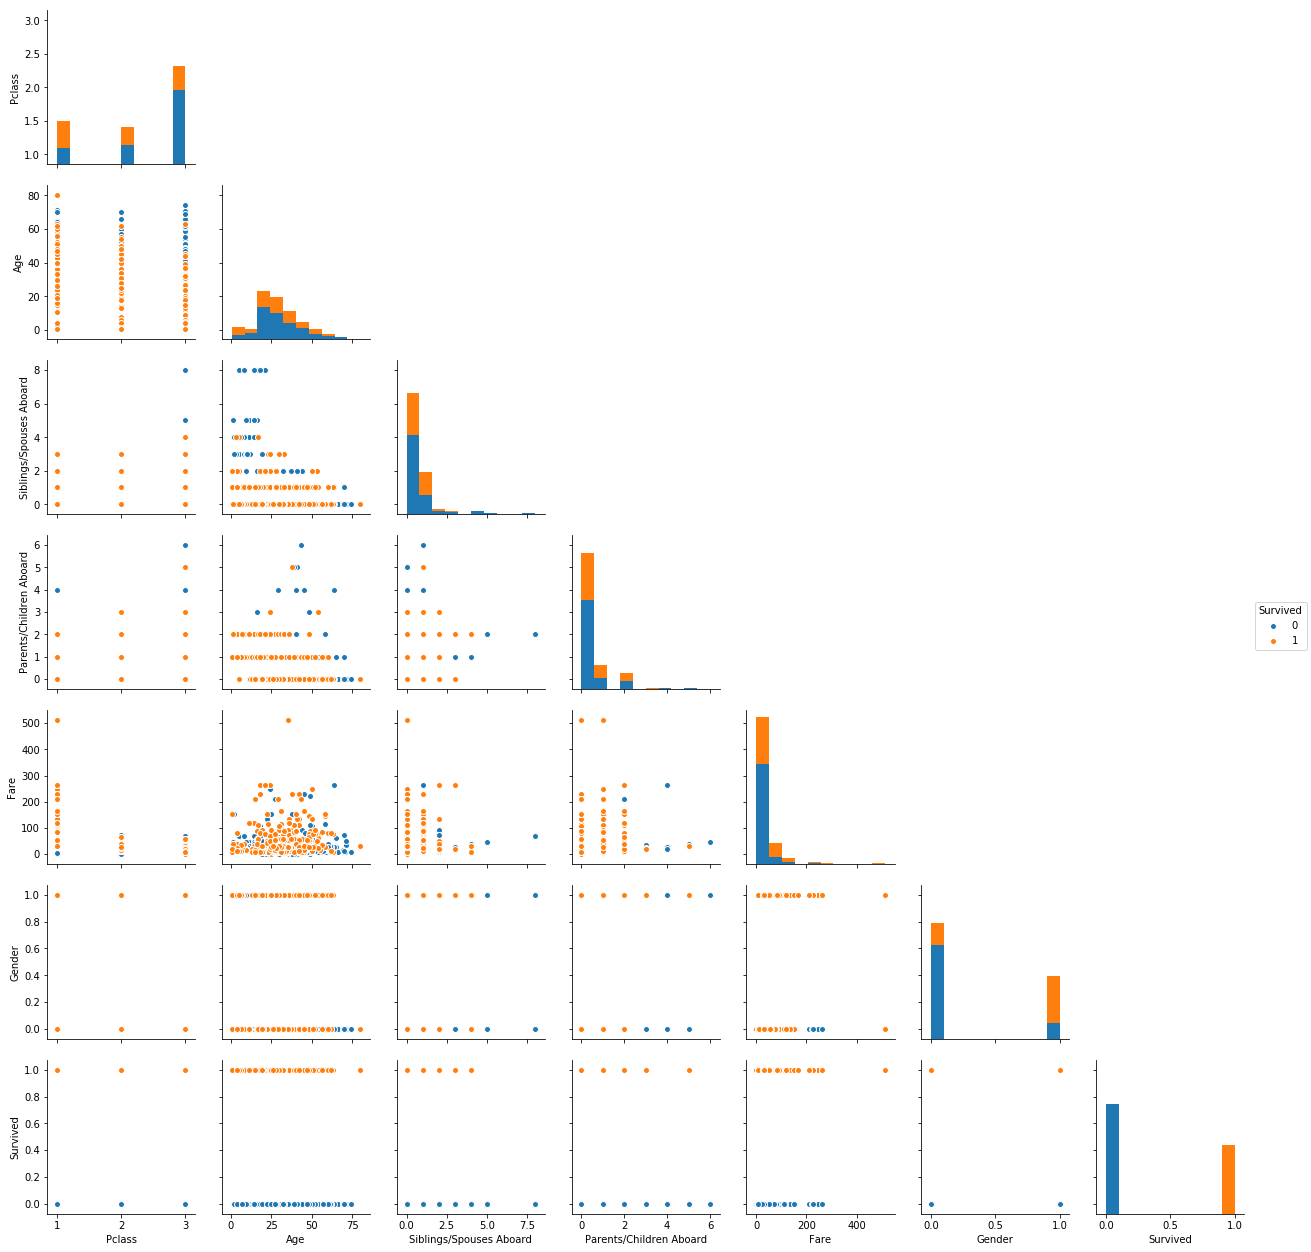

In [8]:
g = sns.pairplot(Combine, hue='Survived')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

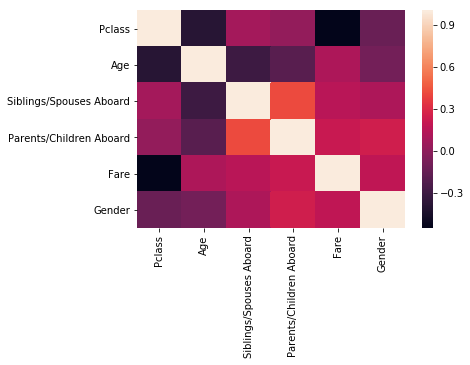

In [9]:
sns.heatmap(Final.corr())
plt.show()

In [10]:
Combine.corr(method ='pearson')

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender,Survived
Pclass,1.000000,-0.391492,0.085026,0.020252,-0.548919,-0.129507,-0.336528
Age,-0.391492,1.000000,-0.297669,-0.193741,0.112329,-0.091875,-0.059665
Siblings/Spouses Aboard,0.085026,-0.297669,1.000000,0.414244,0.158839,0.113249,-0.037082
Parents/Children Aboard,0.020252,-0.193741,0.414244,1.000000,0.215470,0.244337,0.080097
Fare,-0.548919,0.112329,0.158839,0.215470,1.000000,0.181137,0.256179
Gender,-0.129507,-0.091875,0.113249,0.244337,0.181137,1.000000,0.542152
Survived,-0.336528,-0.059665,-0.037082,0.080097,0.256179,0.542152,1.000000


Top most correlated features with survived are Gender, Pclass and Fare. Also, the Pclass and Fare have a negative correlation. 

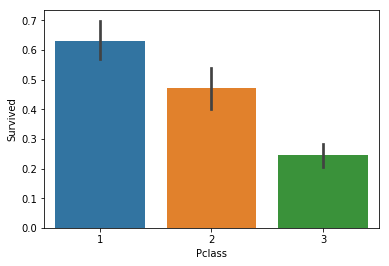

In [11]:
sns.barplot(x='Pclass', y='Survived', data=training_data)

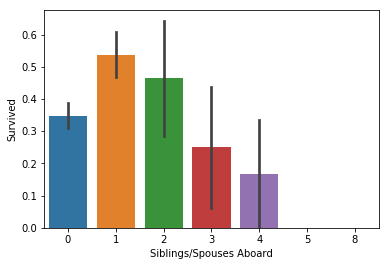

In [12]:
sns.barplot(x='Siblings/Spouses Aboard', y='Survived', data=training_data)

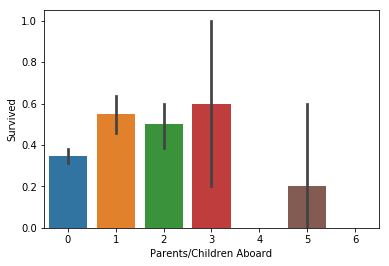

In [13]:
sns.barplot(x='Parents/Children Aboard', y='Survived', data=training_data)

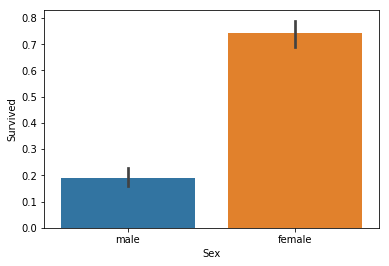

In [14]:
sns.barplot(x='Sex', y='Survived', data=training_data)

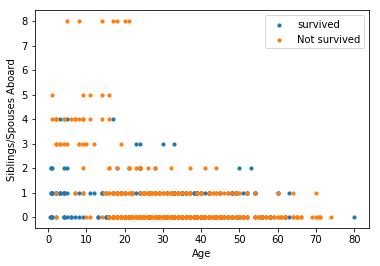

In [15]:
X = Final.iloc[:,:] 
y = training_data.iloc[:,0]
survived = Final.loc[y == 1]
not_survived = Final.loc[y == 0]
plt.scatter(survived.iloc[:, 1], survived.iloc[:, 2], s=10, label='survived')
plt.scatter(not_survived.iloc[:, 1], not_survived.iloc[:, 2], s=10, label='Not survived')
plt.xlabel('Age')
plt.ylabel('Siblings/Spouses Aboard')
plt.legend()
plt.show()

<function matplotlib.pyplot.show>

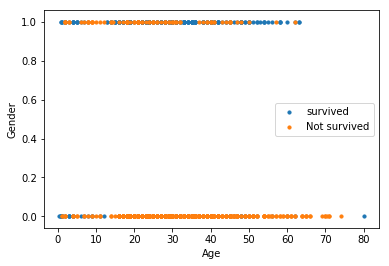

In [16]:
X = Final.iloc[:,:]
y = training_data.iloc[:,0]
survived = Final.loc[y == 1]
not_survived = Final.loc[y == 0]
plt.scatter(survived.iloc[:, 1], survived.iloc[:, 5], s=10, label='survived')
plt.scatter(not_survived.iloc[:, 1], not_survived.iloc[:, 5], s=10, label='Not survived')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

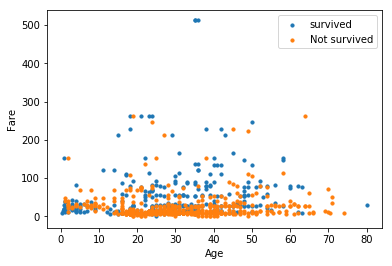

In [17]:
X = Final.iloc[:,:]
y = training_data.iloc[:,0]
survived = Final.loc[y == 1]
not_survived = Final.loc[y == 0]
plt.scatter(survived.iloc[:, 1], survived.iloc[:, 4], s=10, label='survived')
plt.scatter(not_survived.iloc[:, 1], not_survived.iloc[:, 4], s=10, label='Not survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

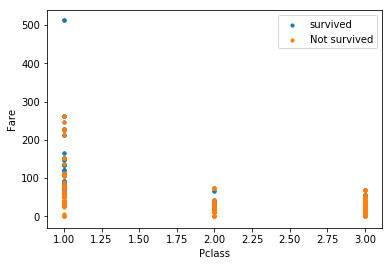

In [18]:
X = Final.iloc[:,:]
y = training_data.iloc[:,0]
survived = Final.loc[y == 1]
not_survived = Final.loc[y == 0]
plt.scatter(survived.iloc[:, 0], survived.iloc[:, 4], s=10, label='survived')
plt.scatter(not_survived.iloc[:, 0], not_survived.iloc[:, 4], s=10, label='Not survived')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.legend()
plt.show

In [19]:
Final.describe()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
count,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,2.305524,29.471443,0.525366,0.383315,32.30542,0.354002
std,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480
min,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.45420,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


# Counts

Counting the number of people in each category

In [20]:
training_data['Pclass'].value_counts(sort=False, ascending=True)

1    216
2    184
3    487
Name: Pclass, dtype: int64

In [21]:
training_data['Age'].value_counts(sort=True, ascending=False)

22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
19.00    33
30.00    33
27.00    26
29.00    25
23.00    25
25.00    24
20.00    23
36.00    23
26.00    21
35.00    21
32.00    21
16.00    20
31.00    19
40.00    18
39.00    18
34.00    17
33.00    17
42.00    17
17.00    16
45.00    14
37.00    12
48.00    12
38.00    12
4.00     11
2.00     11
         ..
66.00     2
59.00     2
28.50     2
45.50     2
0.83      2
30.50     2
70.00     2
0.75      2
10.00     2
63.00     2
13.00     2
40.50     2
32.50     2
71.00     2
12.00     2
0.67      1
0.92      1
74.00     1
34.50     1
14.50     1
24.50     1
80.00     1
20.50     1
53.00     1
69.00     1
70.50     1
36.50     1
23.50     1
55.50     1
0.42      1
Name: Age, Length: 89, dtype: int64

In [22]:
min(training_data['Age']), max(training_data['Age'])

(0.41999999999999998, 80.0)

In [23]:
print("Age<=10:",len(np.array(np.where(Final['Age']<=10)).T))
print("10<Age<=20:",len(np.array(np.where(Final['Age']<=20)).T)-len(np.array(np.where(Final['Age']<=10)).T))
print("20<Age<=30:",len(np.array(np.where(Final['Age']<=30)).T)-len(np.array(np.where(Final['Age']<=20)).T))
print("30<Age<=40:",len(np.array(np.where(Final['Age']<=40)).T)-len(np.array(np.where(Final['Age']<=30)).T))
print("40<Age<=50:",len(np.array(np.where(Final['Age']<=50)).T)-len(np.array(np.where(Final['Age']<=40)).T))
print("50<Age<=60:",len(np.array(np.where(Final['Age']<=60)).T)-len(np.array(np.where(Final['Age']<=50)).T))
print("60<Age<=70:",len(np.array(np.where(Final['Age']<=70)).T)-len(np.array(np.where(Final['Age']<=60)).T))
print("70<Age<=80:",len(np.array(np.where(Final['Age']<=80)).T)-len(np.array(np.where(Final['Age']<=70)).T))
print("Age>80:",len(np.array(np.where(Final['Age']>80)).T))

Age<=10: 73
10<Age<=20: 149
20<Age<=30: 303
30<Age<=40: 184
40<Age<=50: 106
50<Age<=60: 46
60<Age<=70: 21
70<Age<=80: 5
Age>80: 0


In [24]:
training_data['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True)

0    604
1    209
2     28
3     16
4     18
5      5
8      7
Name: Siblings/Spouses Aboard, dtype: int64

In [25]:
training_data['Parents/Children Aboard'].value_counts(sort=False, ascending=True)

0    674
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parents/Children Aboard, dtype: int64

In [26]:
training_data['Fare'].value_counts(sort=True, ascending=False)

8.0500      43
13.0000     42
7.8958      36
7.7500      33
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
56.4958      7
15.5000      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [27]:
min(training_data['Fare']), max(training_data['Fare'])

(0.0, 512.32920000000001)

In [28]:
print("Fare<=5:",len(np.array(np.where(Final['Fare']<=5)).T))
print("5<Fare<=10:",len(np.array(np.where(Final['Fare']<=10)).T)-len(np.array(np.where(Final['Fare']<=5)).T))
print("10<Fare<=15:",len(np.array(np.where(Final['Fare']<=15)).T)-len(np.array(np.where(Final['Fare']<=10)).T))
print("15<Fare<=30:",len(np.array(np.where(Final['Fare']<=30)).T)-len(np.array(np.where(Final['Fare']<=15)).T))
print("30<Fare<=50:",len(np.array(np.where(Final['Fare']<=50)).T)-len(np.array(np.where(Final['Fare']<=30)).T))
print("50<Fare<=100:",len(np.array(np.where(Final['Fare']<=100)).T)-len(np.array(np.where(Final['Fare']<=50)).T))
print("100<Fare<=150:",len(np.array(np.where(Final['Fare']<=150)).T)-len(np.array(np.where(Final['Fare']<=100)).T))
print("150<Fare<=200:",len(np.array(np.where(Final['Fare']<=200)).T)-len(np.array(np.where(Final['Fare']<=150)).T))
print("200<Fare<=513:",len(np.array(np.where(Final['Fare']<=513)).T)-len(np.array(np.where(Final['Fare']<=200)).T))
print("Fare>513:",len(np.array(np.where(Final['Fare']>513)).T))

Fare<=5: 17
5<Fare<=10: 316
10<Fare<=15: 122
15<Fare<=30: 198
30<Fare<=50: 74
50<Fare<=100: 107
100<Fare<=150: 24
150<Fare<=200: 9
200<Fare<=513: 20
Fare>513: 0


In [29]:
training_data['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [30]:
training_data['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

# Finding the proportion survived in each category

In [31]:
def proportions_pclass_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]

    S1= (np.array(np.where((survived.iloc[:, 0]==1))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 0]==2))).shape)[1]
    S3= (np.array(np.where((survived.iloc[:, 0]==3))).shape)[1]

    P1=np.array(Final['Pclass'].value_counts(sort=False, ascending=True))[0]
    P2=np.array(Final['Pclass'].value_counts(sort=False, ascending=True))[1]
    P3=np.array(Final['Pclass'].value_counts(sort=False, ascending=True))[2]
    
    print("Proportion of Pclass 1 survived:",S1/P1)
    print("Proportion of Pclass 2 survived:",S2/P2)
    print("Proportion of Pclass 3 survived:",S3/P3)

proportions_pclass_survived()

Proportion of Pclass 1 survived: 0.62962962963
Proportion of Pclass 2 survived: 0.472826086957
Proportion of Pclass 3 survived: 0.244353182752


In [32]:
def proportions_age_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]
    
    S1= (np.array(np.where((survived.iloc[:, 1]<=10))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 1]<=20))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=10))).shape)[1]
    S3= (np.array(np.where((survived.iloc[:, 1]<=30))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=20))).shape)[1]
    S4= (np.array(np.where((survived.iloc[:, 1]<=40))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=30))).shape)[1]
    S5= (np.array(np.where((survived.iloc[:, 1]<=50))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=40))).shape)[1]
    S6= (np.array(np.where((survived.iloc[:, 1]<=60))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=50))).shape)[1]
    S7= (np.array(np.where((survived.iloc[:, 1]<=70))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=60))).shape)[1]
    S8= (np.array(np.where((survived.iloc[:, 1]<=80))).shape)[1] -(np.array(np.where((survived.iloc[:, 1]<=70))).shape)[1]
    
    P1= len(np.array(np.where(Final['Age']<=10)).T)
    P2= len(np.array(np.where(Final['Age']<=20)).T)-len(np.array(np.where(Final['Age']<=10)).T)
    P3= len(np.array(np.where(Final['Age']<=30)).T)-len(np.array(np.where(Final['Age']<=20)).T)
    P4= len(np.array(np.where(Final['Age']<=40)).T)-len(np.array(np.where(Final['Age']<=30)).T)
    P5= len(np.array(np.where(Final['Age']<=50)).T)-len(np.array(np.where(Final['Age']<=40)).T)
    P6= len(np.array(np.where(Final['Age']<=60)).T)-len(np.array(np.where(Final['Age']<=50)).T)
    P7= len(np.array(np.where(Final['Age']<=70)).T)-len(np.array(np.where(Final['Age']<=60)).T)
    P8= len(np.array(np.where(Final['Age']<=80)).T)-len(np.array(np.where(Final['Age']<=70)).T)
    
    print("Proportion of Age<=10 survived:",S1/P1)
    print("Proportion of 10<Age<=20 survived:",S2/P2)
    print("Proportion of 20<Age<=30 survived:",S3/P3)
    print("Proportion of 30<Age<=40 survived:",S4/P4)
    print("Proportion of 40<Age<=50 survived:",S5/P5)
    print("Proportion of 50<Age<=60 survived:",S6/P6)
    print("Proportion of 60<Age<=70 survived:",S7/P7)
    print("Proportion of 70<Age<=80 survived:",S8/P8)

proportions_age_survived()

Proportion of Age<=10 survived: 0.5616438356164384
Proportion of 10<Age<=20 survived: 0.348993288590604
Proportion of 20<Age<=30 survived: 0.3432343234323432
Proportion of 30<Age<=40 survived: 0.43478260869565216
Proportion of 40<Age<=50 survived: 0.4056603773584906
Proportion of 50<Age<=60 survived: 0.3695652173913043
Proportion of 60<Age<=70 survived: 0.19047619047619047
Proportion of 70<Age<=80 survived: 0.2


In [33]:
def proportions_Siblings_Spouses_Aboard_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]

    S1= (np.array(np.where((survived.iloc[:, 2]==0))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 2]==1))).shape)[1]
    S3= (np.array(np.where((survived.iloc[:, 2]==2))).shape)[1]
    S4= (np.array(np.where((survived.iloc[:, 2]==3))).shape)[1]
    S5= (np.array(np.where((survived.iloc[:, 2]==4))).shape)[1]
    S6= (np.array(np.where((survived.iloc[:, 2]==5))).shape)[1]
    S7= (np.array(np.where((survived.iloc[:, 2]==8))).shape)[1]

    P1=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[0]
    P2=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]
    P3=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]
    P4=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]
    P5=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]
    P6=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]
    P7=np.array(Final['Siblings/Spouses Aboard'].value_counts(sort=False, ascending=True))[1]

    print("Proportion of 0 Siblings/Spouses Aboard survived:",S1/P1)
    print("Proportion of 1 Siblings/Spouses Aboard survived:",S2/P2)
    print("Proportion of 2 Siblings/Spouses Aboard survived:",S3/P3)
    print("Proportion of 3 Siblings/Spouses Aboard survived:",S4/P4)
    print("Proportion of 4 Siblings/Spouses Aboard survived:",S5/P5)
    print("Proportion of 5 Siblings/Spouses Aboard survived:",S6/P6)
    print("Proportion of 8 Siblings/Spouses Aboard survived:",S7/P7)
    
proportions_Siblings_Spouses_Aboard_survived()

Proportion of 0 Siblings/Spouses Aboard survived: 0.347682119205
Proportion of 1 Siblings/Spouses Aboard survived: 0.535885167464
Proportion of 2 Siblings/Spouses Aboard survived: 0.0622009569378
Proportion of 3 Siblings/Spouses Aboard survived: 0.0191387559809
Proportion of 4 Siblings/Spouses Aboard survived: 0.0143540669856
Proportion of 5 Siblings/Spouses Aboard survived: 0.0
Proportion of 8 Siblings/Spouses Aboard survived: 0.0


In [34]:
def proportions_Parents_Children_Aboard_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]

    S1= (np.array(np.where((survived.iloc[:, 3]==0))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 3]==1))).shape)[1]
    S3= (np.array(np.where((survived.iloc[:, 3]==2))).shape)[1]
    S4= (np.array(np.where((survived.iloc[:, 3]==3))).shape)[1]
    S5= (np.array(np.where((survived.iloc[:, 3]==4))).shape)[1]
    S6= (np.array(np.where((survived.iloc[:, 3]==5))).shape)[1]
    S7= (np.array(np.where((survived.iloc[:, 3]==6))).shape)[1]

    P1=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[0]
    P2=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]
    P3=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]
    P4=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]
    P5=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]
    P6=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]
    P7=np.array(Final['Parents/Children Aboard'].value_counts(sort=False, ascending=True))[1]

    print("Proportion of 0 Parents/Children Aboard survived:",S1/P1)
    print("Proportion of 1 Parents/Children Aboard survived:",S2/P2)
    print("Proportion of 2 Parents/Children Aboard survived:",S3/P3)
    print("Proportion of 3 Parents/Children Aboard survived:",S4/P4)
    print("Proportion of 4 Parents/Children Aboard survived:",S5/P5)
    print("Proportion of 5 Parents/Children Aboard survived:",S6/P6)
    print("Proportion of 6 Parents/Children Aboard survived:",S7/P7)

proportions_Parents_Children_Aboard_survived()

Proportion of 0 Parents/Children Aboard survived: 0.345697329377
Proportion of 1 Parents/Children Aboard survived: 0.550847457627
Proportion of 2 Parents/Children Aboard survived: 0.338983050847
Proportion of 3 Parents/Children Aboard survived: 0.0254237288136
Proportion of 4 Parents/Children Aboard survived: 0.0
Proportion of 5 Parents/Children Aboard survived: 0.00847457627119
Proportion of 6 Parents/Children Aboard survived: 0.0


In [35]:
def proportions_fare_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]
    
    S1= (np.array(np.where((survived.iloc[:, 4]<=5))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 4]<=10))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=5))).shape)[1]
    S3= (np.array(np.where((survived.iloc[:, 4]<=15))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=10))).shape)[1]
    S4= (np.array(np.where((survived.iloc[:, 4]<=30))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=15))).shape)[1]
    S5= (np.array(np.where((survived.iloc[:, 4]<=50))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=30))).shape)[1]
    S6= (np.array(np.where((survived.iloc[:, 4]<=100))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=50))).shape)[1]
    S7= (np.array(np.where((survived.iloc[:, 4]<=150))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=100))).shape)[1]
    S8= (np.array(np.where((survived.iloc[:, 4]<=200))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=150))).shape)[1]
    S9= (np.array(np.where((survived.iloc[:, 4]<=513))).shape)[1] -(np.array(np.where((survived.iloc[:, 4]<=200))).shape)[1]
    
    P1= len(np.array(np.where(Final['Fare']<=5)).T)
    P2= len(np.array(np.where(Final['Fare']<=10)).T)-len(np.array(np.where(Final['Fare']<=5)).T)
    P3= len(np.array(np.where(Final['Fare']<=15)).T)-len(np.array(np.where(Final['Fare']<=10)).T)
    P4= len(np.array(np.where(Final['Fare']<=30)).T)-len(np.array(np.where(Final['Fare']<=15)).T)
    P5= len(np.array(np.where(Final['Fare']<=50)).T)-len(np.array(np.where(Final['Fare']<=30)).T)
    P6= len(np.array(np.where(Final['Fare']<=100)).T)-len(np.array(np.where(Final['Fare']<=50)).T)
    P7= len(np.array(np.where(Final['Fare']<=150)).T)-len(np.array(np.where(Final['Fare']<=100)).T)
    P8= len(np.array(np.where(Final['Fare']<=200)).T)-len(np.array(np.where(Final['Fare']<=150)).T)
    P9= len(np.array(np.where(Final['Fare']<=513)).T)-len(np.array(np.where(Final['Fare']<=200)).T)
    
    print("Proportion of Fare<=5 survived:",S1/P1)
    print("Proportion of 5<Fare<=10 survived:",S2/P2)
    print("Proportion of 10<Fare<=15 survived:",S3/P3)
    print("Proportion of 15<Fare<=30 survived:",S4/P4)
    print("Proportion of 30<Fare<=50 survived:",S5/P5)
    print("Proportion of 50<Fare<=100 survived:",S6/P6)
    print("Proportion of 100<Fare<=150 survived:",S7/P7)
    print("Proportion of 150<Fare<=200 survived:",S8/P8)
    print("Proportion of 200<Fare<=513 survived:",S9/P9)

proportions_fare_survived()

Proportion of Fare<=5 survived: 0.058823529411764705
Proportion of 5<Fare<=10 survived: 0.2088607594936709
Proportion of 10<Fare<=15 survived: 0.38524590163934425
Proportion of 15<Fare<=30 survived: 0.46464646464646464
Proportion of 30<Fare<=50 survived: 0.36486486486486486
Proportion of 50<Fare<=100 survived: 0.6542056074766355
Proportion of 100<Fare<=150 survived: 0.7916666666666666
Proportion of 150<Fare<=200 survived: 0.6666666666666666
Proportion of 200<Fare<=513 survived: 0.7


In [36]:
def proportions_gender_survived():
    X = Final.iloc[:,:] 
    y = training_data.iloc[:,0]
    survived = Final.loc[y == 1]
    not_survived = Final.loc[y == 0]

    S1= (np.array(np.where((survived.iloc[:, 5]==0))).shape)[1]
    S2= (np.array(np.where((survived.iloc[:, 5]==1))).shape)[1]

    P1=np.array(Final['Gender'].value_counts(sort=False, ascending=True))[0]
    P2=np.array(Final['Gender'].value_counts(sort=False, ascending=True))[1]

    print("Proportion of Male survived:",S1/P1)
    print("Number of male survived:",S1,"and","total male:",P1)
    print("Proportion of Female survived:",S2/P2)
    print("Number of female survived:",S2,"and","total female:",P2)
    
proportions_gender_survived()

Proportion of Male survived: 0.190226876091
Number of male survived: 109 and total male: 573
Proportion of Female survived: 0.742038216561
Number of female survived: 233 and total female: 314


Finding mean, median and mode for Fare and Age

In [37]:
print("mean of fare:", training_data['Fare'].mean())
print("median of fare:", training_data['Fare'].median()) 
print("mode of fare:", training_data['Fare'].mode())

mean of fare: 32.30542018038328
median of fare: 14.4542
mode of fare: 0    8.05
dtype: float64


Fare is positively skewed

In [38]:
print("mean of age:", training_data['Age'].mean())
print("median of age:", training_data['Age'].median()) 
print("mode of age:", training_data['Age'].mode())

mean of age: 29.471443066516347
median of age: 28.0
mode of age: 0    22.0
dtype: float64


Age is positively skewed

# Minmax normalisation

We want to normalise the dataset so that some features don't converge faster than other features in the gradient descent.

In [39]:
def normalise(X):
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = (X-mins)/rng 
    return norm_X 

We now normalise the Final dataset. Below is the first 5 rows of the dataset.

In [40]:
Data_Norm=normalise(Final)
Data_Norm.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,1.0,0.271174,0.125,0.0,0.014151,0.0
1,0.0,0.472229,0.125,0.0,0.139136,1.0
2,1.0,0.321438,0.000,0.0,0.015469,1.0
3,0.0,0.434531,0.125,0.0,0.103644,1.0
4,1.0,0.434531,0.000,0.0,0.015713,0.0


# Getting the matrix

 We now want to arrange our normalised dataset, Data_Norm, into a Matrix.

In [41]:
Matrix=np.c_[np.ones((Data_Norm.shape[0],1)),Data_Norm]
Matrix, Matrix.shape

(array([[ 1.        ,  1.        ,  0.27117366, ...,  0.        ,
          0.01415106,  0.        ],
        [ 1.        ,  0.        ,  0.4722292 , ...,  0.        ,
          0.13913574,  1.        ],
        [ 1.        ,  1.        ,  0.32143755, ...,  0.        ,
          0.01546857,  1.        ],
        ..., 
        [ 1.        ,  1.        ,  0.08268409, ...,  0.33333333,
          0.04577135,  1.        ],
        [ 1.        ,  0.        ,  0.32143755, ...,  0.        ,
          0.0585561 ,  0.        ],
        [ 1.        ,  1.        ,  0.39683338, ...,  0.        ,
          0.01512699,  0.        ]]), (887, 7))

In [42]:
Combine_matrix=np.array(pd.concat([Data_Norm,Output],axis=1))
Matrix_Combine=np.insert(Combine_matrix,0,np.array((np.ones(887))),1) #adding ones column so that we can take the matrix product
Matrix_Combine, Matrix_Combine.shape

(array([[ 1.        ,  1.        ,  0.27117366, ...,  0.01415106,
          0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.4722292 , ...,  0.13913574,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  0.32143755, ...,  0.01546857,
          1.        ,  1.        ],
        ..., 
        [ 1.        ,  1.        ,  0.08268409, ...,  0.04577135,
          1.        ,  0.        ],
        [ 1.        ,  0.        ,  0.32143755, ...,  0.0585561 ,
          0.        ,  1.        ],
        [ 1.        ,  1.        ,  0.39683338, ...,  0.01512699,
          0.        ,  0.        ]]), (887, 8))

An array of normalised features, with the ones column, and the output column, for use in train-test split.

# Building a model

In [43]:
#Initial weights
w=np.array([1,2,3,4,5,6,7])

In [44]:
#Probability of surviving
def sigmoid(m,w): 
    return 1.0/(1 + np.exp(-np.dot(m,w))) 

We want to minimise the average cost

In [45]:
def compute_cost(y,m,w): #Scalar
    h=sigmoid(m,w)
    arg= (y*np.log(h)+(1-y)*np.log(1-h)) 
    return -(arg.T.dot(arg))/len(y) 

Differentiating the cost function

In [46]:
def compute_gradient(y,m,w): #procedure to find the gradient vector
    err = sigmoid(m,w)-y
    grad = (m.T.dot(err))/len(y) 
    return grad, err

Using gradient descent: find updated weights from the training data, as there are no closed form solutions to grad=0

In [47]:
def gradient_descent(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, w5={w5}, w6={w6}".format(
              bi=n_iter, ti=max_iters - 1, l=loss,  w0=w[0], w1=w[1], w2=w[2], w3=w[3], w4=w[4], w5=w[5], w6=w[6]))
    return losses, ws

In [48]:
def last_iter_parameters(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1], w[2], w[3], w[4], w[5], w[6]] #gives a list of parameters for the last iterate

The procedure below shows the losses for each iteration so that we know it converges.

In [49]:
def losses(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
        print (np.asarray(loss))

Plot of losses function to check if the cost converges with the number of iterations

In [50]:
def lossesplot(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
    cost = list(losses)
    n_iterations = [x for x in range(1,max_iters+1)]
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')

# Building a classifier

In [51]:
def predictions(X,w):
    preds=[]
    for i in sigmoid(X, w):
        if i> 0.5:
            preds.append(1)
        if i < 0.5:
            preds.append(0)
    return np.array(preds)

#Using the parameters found from training set and the Matrix we find the probability of survival 
#i.e if probability is less than 0.5 then Survived =0.

# Find the accuracy of predictions

In [52]:
#Gives test accuracy for the parameters, i.e. how many predictions were correct
def accuracy(X,w,y):
    return len(np.array((np.where(predictions(X,w)==y))).T)/len(y)

To help choose the number of iterations for a certain stepsize, tau 

In [53]:
def parameters_accuracies(y,x,tau,xt,yt):
    for i in range (500,5000,500):
        a= last_iter_parameters(y,x,w,i,tau)
        b=accuracy(xt,a,yt)
        print("with", i,"iterations and stepsize=", tau, "we get the following test accuracy:", b)

# Train-test data split (for out of sample validation)

In [54]:
#Finding 20% of the number of observations
int((Matrix_Combine[:,0].shape[0])/5) 

177

In [55]:
#out of sample validation
np.random.seed(10) #20-80 split
perm=np.random.permutation(887)
x_train,x_test= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train,y_test=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]

In [56]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((710, 7), (177, 7), (710,), (177,))

To decide the number of iterations and stepsize

In [57]:
for i in np.arange(0.1,2,0.1):
    print(parameters_accuracies(y_train,x_train,i,x_test,y_test)) #choose gamma=1.9, max_iters=500

with 500 iterations and stepsize= 0.1 we get the following test accuracy: 0.7909604519774012
with 1000 iterations and stepsize= 0.1 we get the following test accuracy: 0.7627118644067796
with 1500 iterations and stepsize= 0.1 we get the following test accuracy: 0.7627118644067796
with 2000 iterations and stepsize= 0.1 we get the following test accuracy: 0.7853107344632768
with 2500 iterations and stepsize= 0.1 we get the following test accuracy: 0.7966101694915254
with 3000 iterations and stepsize= 0.1 we get the following test accuracy: 0.8022598870056498
with 3500 iterations and stepsize= 0.1 we get the following test accuracy: 0.8022598870056498
with 4000 iterations and stepsize= 0.1 we get the following test accuracy: 0.8022598870056498
with 4500 iterations and stepsize= 0.1 we get the following test accuracy: 0.7966101694915254
None
with 500 iterations and stepsize= 0.2 we get the following test accuracy: 0.7627118644067796
with 1000 iterations and stepsize= 0.2 we get the followi

with 3500 iterations and stepsize= 1.0 we get the following test accuracy: 0.8135593220338984
with 4000 iterations and stepsize= 1.0 we get the following test accuracy: 0.8135593220338984
with 4500 iterations and stepsize= 1.0 we get the following test accuracy: 0.8135593220338984
None
with 500 iterations and stepsize= 1.1 we get the following test accuracy: 0.8022598870056498
with 1000 iterations and stepsize= 1.1 we get the following test accuracy: 0.8192090395480226
with 1500 iterations and stepsize= 1.1 we get the following test accuracy: 0.8135593220338984
with 2000 iterations and stepsize= 1.1 we get the following test accuracy: 0.8135593220338984
with 2500 iterations and stepsize= 1.1 we get the following test accuracy: 0.8135593220338984
with 3000 iterations and stepsize= 1.1 we get the following test accuracy: 0.8135593220338984
with 3500 iterations and stepsize= 1.1 we get the following test accuracy: 0.8135593220338984
with 4000 iterations and stepsize= 1.1 we get the follow

Choose stepsize, tau=1.9, max_iters=500

In [58]:
gradient_descent(y_train, x_train, w, 500, 1.9)

Gradient Descent(0/499): loss=-25.54935547662346, w0=-0.13361691524718355, w1=1.1137775151848084, w2=2.570044586640156, w3=3.922173244073798, w4=4.9356071984352985, w5=5.952796635156053, w6=6.818039716065224
Gradient Descent(1/499): loss=-13.859355322734316, w0=-1.1558339511530056, w1=0.3056622852445027, w2=2.1805789662302755, w3=3.8463075526161394, w4=4.872366713836063, w5=5.90921138265668, w6=6.636146354404791
Gradient Descent(2/499): loss=-7.551189948344418, w0=-1.8347903518742323, w1=-0.23435658695861383, w2=1.9173566320322157, w3=3.7780221173491655, w4=4.81357355398487, w5=5.876030046174744, w6=6.454673025319569
Gradient Descent(3/499): loss=-4.984044521393974, w0=-2.2150690372376727, w1=-0.5443995413943019, w2=1.7690237581028876, w3=3.720343588098924, w4=4.761594631832302, w5=5.853218815612455, w6=6.2745976535739105
Gradient Descent(4/499): loss=-3.8811204165886637, w0=-2.461540749255681, w1=-0.7582760438992979, w2=1.6732586971419512, w3=3.6700486003495767, w4=4.714772067233664, 

Gradient Descent(380/499): loss=-0.49135851519667145, w0=0.3868798250816086, w1=-1.9175334222837752, w2=-2.1019431674222937, w3=-1.6812193345475595, w4=-0.6170110708712794, w5=4.268969524359052, w6=2.632165297525845
Gradient Descent(381/499): loss=-0.491353926008107, w0=0.39026895333301936, w1=-1.918977816627952, w2=-2.107251426764503, w3=-1.6860007657616802, w4=-0.6197860478377358, w5=4.266596331265446, w6=2.6325705879838934
Gradient Descent(382/499): loss=-0.4913499734890373, w0=0.3936449044037167, w1=-1.9204179402299284, w2=-2.112538819980188, w3=-1.6907636981887162, w4=-0.6225385962943091, w5=4.264227395641052, w6=2.6329742705675376
Gradient Descent(383/499): loss=-0.4913466479718022, w0=0.39700773639693815, w1=-1.9218538003291925, w2=-2.117805433926322, w3=-1.6955082376137813, w4=-0.6252688812368591, w5=4.2618626944609055, w6=2.6333763493693163
Gradient Descent(384/499): loss=-0.49134393992470216, w0=0.4003575071519251, w1=-1.9232854042746914, w2=-2.1230513551076675, w3=-1.7002344

([-25.549355476623461,
  -13.859355322734316,
  -7.551189948344418,
  -4.9840445213939741,
  -3.8811204165886637,
  -3.2561654133744073,
  -2.8479329011473378,
  -2.5626950186040687,
  -2.3563816087321845,
  -2.2039159407770725,
  -2.0889455946514683,
  -1.9999205813609127,
  -1.928486821535468,
  -1.8687149646681127,
  -1.8165751356667488,
  -1.7694704281148421,
  -1.7258155960015233,
  -1.6846900840436285,
  -1.6455808742675364,
  -1.6082088382920001,
  -1.572420379021376,
  -1.5381243443086461,
  -1.5052576621313543,
  -1.4737679450963517,
  -1.4436055071251483,
  -1.4147202757771828,
  -1.387061059841614,
  -1.3605758231321217,
  -1.3352122923713492,
  -1.3109185919151156,
  -1.2876437842400821,
  -1.2653382839432759,
  -1.2439541513170365,
  -1.2234452850894859,
  -1.2037675361658713,
  -1.1848787619298415,
  -1.1667388370509002,
  -1.1493096331657897,
  -1.1325549767526837,
  -1.1164405920994103,
  -1.1009340344238845,
  -1.0860046168319553,
  -1.0716233337883496,
  -1.0577627830

In [59]:
losses(y_train, x_train, w, 500, 1.9) 

-25.54935547662346
-13.859355322734316
-7.551189948344418
-4.984044521393974
-3.8811204165886637
-3.2561654133744073
-2.8479329011473378
-2.5626950186040687
-2.3563816087321845
-2.2039159407770725
-2.0889455946514683
-1.9999205813609127
-1.928486821535468
-1.8687149646681127
-1.8165751356667488
-1.7694704281148421
-1.7258155960015233
-1.6846900840436285
-1.6455808742675364
-1.6082088382920001
-1.572420379021376
-1.538124344308646
-1.5052576621313543
-1.4737679450963517
-1.4436055071251483
-1.4147202757771828
-1.387061059841614
-1.3605758231321217
-1.3352122923713492
-1.3109185919151156
-1.287643784240082
-1.2653382839432759
-1.2439541513170365
-1.223445285089486
-1.2037675361658713
-1.1848787619298415
-1.1667388370509002
-1.1493096331657897
-1.1325549767526837
-1.1164405920994103
-1.1009340344238845
-1.0860046168319553
-1.0716233337883496
-1.057762783039367
-1.0443970873890702
-1.0315018173393409
-1.0190539153177405
-1.0070316220063835
-0.9954144051287864
-0.9841828909348859
-0.9733187

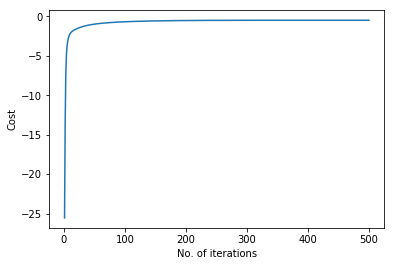

In [60]:
lossesplot(y_train, x_train, w, 500, 1.9)

In [61]:
parameters_train=np.array(last_iter_parameters(y_train,x_train,w,500,1.9))
parameters_train

array([ 0.71165533, -2.06193404, -2.60828502, -2.1438454 , -0.82646566,
        4.01136925,  2.67045982])

# Model testing

In [62]:
print("training set accuracy with 500 iterations and step size 1.9:", accuracy(x_train,parameters_train,y_train))
print("test set accuracy with 500 iterations and step size 1.9:", accuracy(x_test,parameters_train,y_test))

training set accuracy with 500 iterations and step size 1.9: 0.7971830985915493
test set accuracy with 500 iterations and step size 1.9: 0.8192090395480226


Got similar accuracies for both test and train set, which means that the model has low variance and good generalisation ability (not over fit), and high accuracy scores shows that the model has low bias and good prediction quality (not under fit).

In [63]:
#Confusion matrix of test set
from sklearn.metrics import confusion_matrix 
C = confusion_matrix(y_test, predictions(x_test,parameters_train))
C

array([[98, 14],
       [18, 47]])

In [64]:
accuracy_test = (C[0,0]+C[1,1])/y_test.shape
accuracy_test[0]

0.8192090395480226

In [65]:
#Classification report of test set
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions(x_test,parameters_train)))
print("Accuracy:", metrics.accuracy_score(y_test, predictions(x_test,parameters_train)))

             precision    recall  f1-score   support

        0.0       0.84      0.88      0.86       112
        1.0       0.77      0.72      0.75        65

avg / total       0.82      0.82      0.82       177

Accuracy: 0.819209039548


# More tests to verify the model

Take stepsize=1.5

In [66]:
np.random.seed(100)
perm=np.random.permutation(887)
x_train2,x_test2= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train2,y_test2=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]

In [67]:
parameters_accuracies(y_train2,x_train2,1.5,x_test2,y_test2) #choose 1500 iterations

with 500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7966101694915254
with 1000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7966101694915254
with 1500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 2000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 2500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 3000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 3500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 4000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768
with 4500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7853107344632768


In [68]:
parameters_train2=np.array(last_iter_parameters(y_train2,x_train2,w,1500,1.5))
parameters_train2

array([ 1.42063955, -2.41154329, -3.43315967, -2.83822331, -0.51895413,
        1.5022834 ,  2.70669329])

In [69]:
print("training set accuracy:", accuracy(x_train2,parameters_train2,y_train2), "and",
      "test set accuracy:", accuracy(x_test2,parameters_train2,y_test2))

training set accuracy: 0.8070422535211268 and test set accuracy: 0.7853107344632768


In [70]:
np.random.seed(400)
perm=np.random.permutation(887)
x_train3,x_test3= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train3,y_test3=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]

In [71]:
parameters_accuracies(y_train3,x_train3,1.5,x_test3,y_test3) #choose 1000 iterations

with 500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7401129943502824
with 1000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7570621468926554
with 1500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 2000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 2500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 3000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 3500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 4000 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796
with 4500 iterations and stepsize= 1.5 we get the following test accuracy: 0.7627118644067796


In [72]:
parameters_train3=np.array(last_iter_parameters(y_train3,x_train3,w,1000,1.5))
parameters_train3

array([ 0.96738975, -2.15697429, -3.25371905, -3.03421842, -0.15046341,
        3.63793018,  2.7935972 ])

In [73]:
print("training set accuracy:", accuracy(x_train3,parameters_train3,y_train3), "and",
      "test set accuracy:", accuracy(x_test3,parameters_train3,y_test3))

training set accuracy: 0.8042253521126761 and test set accuracy: 0.7570621468926554


In [74]:
np.random.seed(800)
perm=np.random.permutation(887)
x_train4,x_test4= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train4,y_test4=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]

In [75]:
parameters_train4=np.array(last_iter_parameters(y_train4,x_train4,w,1500,1.5))
parameters_train4

array([ 1.18714666, -2.17026338, -3.34357363, -3.62066547, -0.75258098,
        2.33238094,  2.67417318])

In [76]:
print("training set accuracy:", accuracy(x_train4,parameters_train4,y_train4), "and",
      "test set accuracy:", accuracy(x_test4,parameters_train4,y_test4))

training set accuracy: 0.7985915492957747 and test set accuracy: 0.8192090395480226


Comparing 90-10 split and 80-20 split

In [77]:
np.random.seed(800) #90-10 split
perm=np.random.permutation(887)
x_train5,x_test5= Matrix_Combine[perm][89:][:,0:7],Matrix_Combine[perm][:89][:,0:7]
y_train5,y_test5=Matrix_Combine[perm][89:][:,-1],Matrix_Combine[perm][:89][:,-1]

In [78]:
parameters_train5=np.array(last_iter_parameters(y_train5,x_train5,w,1500,1.5))
parameters_train5

array([ 1.2342154 , -2.23080976, -3.39074695, -3.03853795, -0.77948802,
        2.30558597,  2.6609661 ])

In [79]:
print("training set accuracy:", accuracy(x_train5,parameters_train5,y_train5), "and",
      "test set accuracy:", accuracy(x_test5,parameters_train5,y_test5))

training set accuracy: 0.7944862155388471 and test set accuracy: 0.8426966292134831


In [80]:
np.random.seed(800) #80-20 split
perm=np.random.permutation(887)
x_train6,x_test6= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train6,y_test6=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]

In [81]:
parameters_train6=np.array(last_iter_parameters(y_train6,x_train6,w,1500,1.5))
parameters_train6

array([ 1.18714666, -2.17026338, -3.34357363, -3.62066547, -0.75258098,
        2.33238094,  2.67417318])

In [82]:
print("training set accuracy:", accuracy(x_train6,parameters_train6,y_train6), "and",
      "test set accuracy:", accuracy(x_test6,parameters_train6,y_test6))

training set accuracy: 0.7985915492957747 and test set accuracy: 0.8192090395480226


Got higher test accuracy for 90-10 split than for 80-20 split, using the same data

# Cross Validation

5 fold cross-validation: Use four folds of size 177 and one fold of size 179

In [83]:
#5 fold cross-validation

x_fold1= Matrix_Combine[:177][:,0:7]
y_fold1= Matrix_Combine[:177][:,-1]

x_fold2= Matrix_Combine[177:354][:,0:7]
y_fold2= Matrix_Combine[177:354][:,-1]

x_fold3= Matrix_Combine[354:531][:,0:7]
y_fold3= Matrix_Combine[354:531][:,-1]

x_fold4= Matrix_Combine[531:708][:,0:7]
y_fold4= Matrix_Combine[531:708][:,-1]

x_fold5= Matrix_Combine[708:887][:,0:7]
y_fold5= Matrix_Combine[708:887][:,-1]

#test on fold 1
x_train_1, x_test_1= np.concatenate((x_fold2,x_fold3,x_fold4,x_fold5),axis=0), x_fold1
y_train_1, y_test_1= np.concatenate((y_fold2,y_fold3,y_fold4,y_fold5),axis=0), y_fold1
#test on fold 2
x_train_2, x_test_2= np.concatenate((x_fold1,x_fold3,x_fold4,x_fold5),axis=0), x_fold2
y_train_2, y_test_2= np.concatenate((y_fold1,y_fold3,y_fold4,y_fold5),axis=0), y_fold2
#test on fold 3
x_train_3, x_test_3= np.concatenate((x_fold1,x_fold2,x_fold4,x_fold5),axis=0), x_fold3
y_train_3, y_test_3= np.concatenate((y_fold1,y_fold2,y_fold4,y_fold5),axis=0), y_fold3
#test on fold 4
x_train_4, x_test_4= np.concatenate((x_fold1,x_fold2,x_fold3,x_fold5),axis=0), x_fold4
y_train_4, y_test_4= np.concatenate((y_fold1,y_fold2,y_fold3,y_fold5),axis=0), y_fold4
#test on fold 5
x_train_5, x_test_5= np.concatenate((x_fold1,x_fold2,x_fold3,x_fold4),axis=0), x_fold5
y_train_5, y_test_5= np.concatenate((y_fold1,y_fold2,y_fold3,y_fold4),axis=0), y_fold5

Take stepsize, tau=1.9, max_iters=500 

In [84]:
parameters_train_1=np.array(last_iter_parameters(y_train_1,x_train_1,w,500,1.9))
parameters_train_1

array([ 0.68249687, -2.07204552, -2.4028372 , -1.74407173, -0.99131621,
        3.95456535,  2.59695742])

In [85]:
parameters_train_2=np.array(last_iter_parameters(y_train_2,x_train_2,w,500,1.9))
parameters_train_2

array([ 0.72151618, -2.11547432, -2.59947384, -2.69003883, -0.92275925,
        3.28856083,  2.74981976])

In [86]:
parameters_train_3=np.array(last_iter_parameters(y_train_3,x_train_3,w,500,1.9))
parameters_train_3

array([ 0.61905725, -1.82014976, -2.81299093, -2.49559891, -0.85949393,
        4.28101527,  2.67915876])

In [87]:
parameters_train_4=np.array(last_iter_parameters(y_train_4,x_train_4,w,500,1.9))
parameters_train_4

array([ 0.26024818, -1.595985  , -2.46021285, -2.79848064,  0.21709507,
        3.37585938,  2.7464353 ])

In [88]:
parameters_train_5=np.array(last_iter_parameters(y_train_5,x_train_5,w,500,1.9))
parameters_train_5

array([ 0.3947827 , -1.79334178, -2.06155767, -1.87525686, -1.23206349,
        3.13395301,  2.67255468])

In [89]:
print("test accuracy of fold 1:", accuracy(x_test_1,parameters_train_1,y_test_1))
print("test accuracy of fold 2:", accuracy(x_test_2,parameters_train_2,y_test_2))
print("test accuracy of fold 3:", accuracy(x_test_3,parameters_train_3,y_test_3))
print("test accuracy of fold 4:", accuracy(x_test_4,parameters_train_4,y_test_4))
print("test accuracy of fold 5:", accuracy(x_test_5,parameters_train_5,y_test_5))

test accuracy of fold 1: 0.8022598870056498
test accuracy of fold 2: 0.7966101694915254
test accuracy of fold 3: 0.7740112994350282
test accuracy of fold 4: 0.751412429378531
test accuracy of fold 5: 0.8324022346368715


Choosing the final parameters from cross validation, as the average of all the parameters.

In [90]:
Final_parameters=(parameters_train_1+ parameters_train_2+ parameters_train_3+ parameters_train_4+ parameters_train_5)/5
Final_parameters

array([ 0.53562024, -1.87939928, -2.4674145 , -2.32068939, -0.75770756,
        3.60679077,  2.68898518])

In [91]:
print("test accuracy of final parameters on fold 1:", accuracy(x_test_1,Final_parameters,y_test_1))
print("test accuracy of final parameters on fold 2:", accuracy(x_test_2,Final_parameters,y_test_2))
print("test accuracy of final parameters on fold 3:", accuracy(x_test_3,Final_parameters,y_test_3))
print("test accuracy of final parameters on fold 4:", accuracy(x_test_4,Final_parameters,y_test_4))
print("test accuracy of final parameters on fold 5:", accuracy(x_test_5,Final_parameters,y_test_5))

test accuracy of final parameters on fold 1: 0.8022598870056498
test accuracy of final parameters on fold 2: 0.8022598870056498
test accuracy of final parameters on fold 3: 0.7740112994350282
test accuracy of final parameters on fold 4: 0.7853107344632768
test accuracy of final parameters on fold 5: 0.8324022346368715


In [92]:
print("training accuracy of final parameters on fold 1:", accuracy(x_train_1,Final_parameters,y_train_1))
print("training accuracy of final parameters on fold 2:", accuracy(x_train_2,Final_parameters,y_train_2))
print("training accuracy of final parameters on fold 3:", accuracy(x_train_3,Final_parameters,y_train_3))
print("training accuracy of final parameters on fold 4:", accuracy(x_train_4,Final_parameters,y_train_4))
print("training accuracy of final parameters on fold 5:", accuracy(x_train_5,Final_parameters,y_train_5))

training accuracy of final parameters on fold 1: 0.7985915492957747
training accuracy of final parameters on fold 2: 0.7985915492957747
training accuracy of final parameters on fold 3: 0.8056338028169014
training accuracy of final parameters on fold 4: 0.8028169014084507
training accuracy of final parameters on fold 5: 0.7909604519774012


In [93]:
Final_parameters_averageaccuracy= (0.807909604519774+0.8022598870056498+0.7740112994350282+0.7853107344632768+0.8268156424581006)/5
Final_parameters_averageaccuracy

0.7992614335763658

Test on x_test and y_test, randomly permuted 20% of the data

In [94]:
print("test accuracy of final parameters:", accuracy(x_test,Final_parameters,y_test))
print("training accuracy of final parameters:", accuracy(x_train, Final_parameters,y_train))

test accuracy of final parameters: 0.8135593220338984
training accuracy of final parameters: 0.795774647887324


In [95]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, predictions(x_test,Final_parameters))

array([[99, 13],
       [20, 45]])

In [96]:
#Classification report of test set
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions(x_test,Final_parameters)))
print("Accuracy:", metrics.accuracy_score(y_test, predictions(x_test,Final_parameters)))

             precision    recall  f1-score   support

        0.0       0.83      0.88      0.86       112
        1.0       0.78      0.69      0.73        65

avg / total       0.81      0.81      0.81       177

Accuracy: 0.813559322034


The model has a good generalisation ability, as the training accuracy is similar to the test accuracy, and a good prediction quality, as the test accuracy is high. 

# Using Ridge regression

In [97]:
def compute_cost_r(y,m,w,gamma): #scalar
    h=sigmoid(m,w)
    arg= (y*np.log(h)+(1-y)*np.log(1-h)) 
    p= gamma/2*(w.T.dot(w))
    return (-(arg.T.dot(arg)) -  p)/len(y) 

In [98]:
def compute_gradient_r(y,m,w,gamma): #vector
    err = sigmoid(m,w)-y
    grad = (m.T.dot(err))/len(y) + (gamma*w)/len(y)
    return grad, err

In [99]:
def gradient_descent_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        loss = compute_cost_r(y,m,w,gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, w5={w5}, w6={w6}".format(
              bi=n_iter, ti=max_iters - 1, l=loss,  w0=w[0], w1=w[1], w2=w[2], w3=w[3], w4=w[4], w5=w[5], w6=w[6]))
    return losses, ws

In [100]:
def last_iter_parameters_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1], w[2], w[3], w[4], w[5], w[6]] #gives a list of parameters for the last iterate

In [101]:
def losses_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        loss = compute_cost_r(y,m,w,gamma)
        # gradient w by descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
        print (loss)

In [102]:
def lossesplot_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w, gamma)
        loss = compute_cost_r(y, m, w, gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
    cost = list(losses)
    n_iterations = [x for x in range(1,max_iters+1)]
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')

In [103]:
def parameters_accuracies_r(y,x,tau,xt,yt,gamma):
    for i in range (500,5000,500):
        a= last_iter_parameters_r(y,x,w,i,tau,gamma)
        b=accuracy(xt,a,yt)
        print("with", i,"iterations and stepsize=", tau, "we get the following test accuracy:", b)

Deciding the gamma

In [104]:
for i in range(1,10):
    t=last_iter_parameters_r(y_train, x_train, w, 500, 1.9, i)
    print ("for gamma=",i,":","accuracy=",accuracy(x_test,t,y_test))

for gamma= 1 : accuracy= 0.8248587570621468
for gamma= 2 : accuracy= 0.8248587570621468
for gamma= 3 : accuracy= 0.8248587570621468
for gamma= 4 : accuracy= 0.8248587570621468
for gamma= 5 : accuracy= 0.8135593220338984
for gamma= 6 : accuracy= 0.8135593220338984
for gamma= 7 : accuracy= 0.807909604519774
for gamma= 8 : accuracy= 0.807909604519774
for gamma= 9 : accuracy= 0.807909604519774


In [105]:
wr= last_iter_parameters(y_train, x_train, w, 500, 1.9)
wr

[0.71165532696435918,
 -2.0619340446478729,
 -2.6082850169977938,
 -2.143845401185597,
 -0.82646566010860212,
 4.0113692532653253,
 2.6704598213126456]

In [106]:
r= last_iter_parameters_r(y_train, x_train, w, 500, 1.9, 4)
r

[0.15950670652630392,
 -1.7060305215019655,
 -1.0128043995213531,
 -0.58341227966934439,
 -0.16891995502936419,
 0.42372665077876548,
 2.1995515841993321]

Ridge regression regularisation has shrunk the parameters

In [107]:
print("accuracy of test set without regularisation:", accuracy(x_test,last_iter_parameters(y_train, x_train, w, 500, 1.9),y_test))
print("accuracy of test set using ridge regression:", accuracy(x_test,last_iter_parameters_r(y_train, x_train, w, 500, 1.9, 4),y_test))

accuracy of test set without regularisation: 0.8192090395480226
accuracy of test set using ridge regression: 0.8248587570621468


Got higher accuracy with ridge regression regularisation, using the same number of iterations and stepsize.

To check if the cost converges with the number of iterations

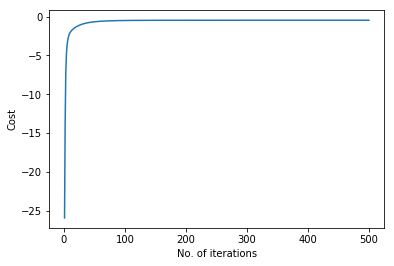

In [108]:
lossesplot_r(y_train, x_train, w, 500, 1.9, 4)

# Trying cross validation on ridge regression

Take maximum iterations=500, stepsize=1.9, gamma=4

In [109]:
r_parameters_train_1=np.array(last_iter_parameters_r(y_train_1,x_train_1,w,500,1.9,4))
r_parameters_train_2=np.array(last_iter_parameters_r(y_train_2,x_train_2,w,500,1.9,4))
r_parameters_train_3=np.array(last_iter_parameters_r(y_train_3,x_train_3,w,500,1.9,4))
r_parameters_train_4=np.array(last_iter_parameters_r(y_train_4,x_train_4,w,500,1.9,4))
r_parameters_train_5=np.array(last_iter_parameters_r(y_train_5,x_train_5,w,500,1.9,4))

r_final_parameters_train= (r_parameters_train_1+r_parameters_train_2+r_parameters_train_3+r_parameters_train_4+r_parameters_train_5)/5
r_final_parameters_train

array([ 0.06298842, -1.5992358 , -0.9856386 , -0.63295391, -0.18479148,
        0.34226685,  2.22306279])

Test accuracies of r_final_parameters_train

In [110]:
print("test accuracy of final parameters on fold 1:", accuracy(x_test_1,r_final_parameters_train,y_test_1))
print("test accuracy of final parameters on fold 2:", accuracy(x_test_2,r_final_parameters_train,y_test_2))
print("test accuracy of final parameters on fold 3:", accuracy(x_test_3,r_final_parameters_train,y_test_3))
print("test accuracy of final parameters on fold 4:", accuracy(x_test_4,r_final_parameters_train,y_test_4))
print("test accuracy of final parameters on fold 5:", accuracy(x_test_5,r_final_parameters_train,y_test_5))

test accuracy of final parameters on fold 1: 0.8192090395480226
test accuracy of final parameters on fold 2: 0.807909604519774
test accuracy of final parameters on fold 3: 0.7853107344632768
test accuracy of final parameters on fold 4: 0.751412429378531
test accuracy of final parameters on fold 5: 0.8156424581005587


Training accuracies of r_final_parameters_train

In [111]:
print("training accuracy of final parameters on fold 1:", accuracy(x_train_1,r_final_parameters_train,y_train_1))
print("training accuracy of final parameters on fold 2:", accuracy(x_train_2,r_final_parameters_train,y_train_2))
print("training accuracy of final parameters on fold 3:", accuracy(x_train_3,r_final_parameters_train,y_train_3))
print("training accuracy of final parameters on fold 4:", accuracy(x_train_4,r_final_parameters_train,y_train_4))
print("training accuracy of final parameters on fold 5:", accuracy(x_train_5,r_final_parameters_train,y_train_5))

training accuracy of final parameters on fold 1: 0.7901408450704225
training accuracy of final parameters on fold 2: 0.7929577464788733
training accuracy of final parameters on fold 3: 0.7985915492957747
training accuracy of final parameters on fold 4: 0.8070422535211268
training accuracy of final parameters on fold 5: 0.7909604519774012


Comparing parameters with and without regularisation

In [112]:
print("without regularisation:", parameters_train_1)
print("with regulaisation:",r_parameters_train_1)
print("without regularisation:",parameters_train_2)
print("with regulaisation:",r_parameters_train_2)
print("without regularisation:",parameters_train_3)
print("with regulaisation:",r_parameters_train_3)
print("without regularisation:",parameters_train_4)
print("with regulaisation:",r_parameters_train_4)
print("without regularisation:",parameters_train_5)
print("with regulaisation:",r_parameters_train_5)

without regularisation: [ 0.68249687 -2.07204552 -2.4028372  -1.74407173 -0.99131621  3.95456535
  2.59695742]
with regulaisation: [ 0.18395711 -1.75056431 -0.9138937  -0.45661725 -0.21305888  0.45659528
  2.15698159]
without regularisation: [ 0.72151618 -2.11547432 -2.59947384 -2.69003883 -0.92275925  3.28856083
  2.74981976]
with regulaisation: [ 0.12251896 -1.7148897  -1.00744585 -0.75101724 -0.23375923  0.28834296
  2.21559165]
without regularisation: [ 0.61905725 -1.82014976 -2.81299093 -2.49559891 -0.85949393  4.28101527
  2.67915876]
with regulaisation: [ 0.07744427 -1.55455188 -1.09699325 -0.67437463 -0.23707917  0.48312178
  2.21719792]
without regularisation: [ 0.26024818 -1.595985   -2.46021285 -2.79848064  0.21709507  3.37585938
  2.7464353 ]
with regulaisation: [-0.10385909 -1.41844246 -1.02660095 -0.7396667   0.07941254  0.26581126
  2.30425419]
without regularisation: [ 0.3947827  -1.79334178 -2.06155767 -1.87525686 -1.23206349  3.13395301
  2.67255468]
with regulaisatio

In [113]:
print("final parameters without regulaisation:",Final_parameters)
print("final parameters with regulaisation:",r_final_parameters_train)

final parameters without regulaisation: [ 0.53562024 -1.87939928 -2.4674145  -2.32068939 -0.75770756  3.60679077
  2.68898518]
final parameters with regulaisation: [ 0.06298842 -1.5992358  -0.9856386  -0.63295391 -0.18479148  0.34226685
  2.22306279]


Cross validation on permuted dataset

In [114]:
#5 fold cross-validation on permuted dataset

np.random.seed(10) 
perm=np.random.permutation(887)

px_fold1= Matrix_Combine[perm][:177][:,0:7]
py_fold1= Matrix_Combine[perm][:177][:,-1]

px_fold2= Matrix_Combine[perm][177:354][:,0:7]
py_fold2= Matrix_Combine[perm][177:354][:,-1]

px_fold3= Matrix_Combine[perm][354:531][:,0:7]
py_fold3= Matrix_Combine[perm][354:531][:,-1]

px_fold4= Matrix_Combine[perm][531:708][:,0:7]
py_fold4= Matrix_Combine[perm][531:708][:,-1]

px_fold5= Matrix_Combine[perm][708:887][:,0:7]
py_fold5= Matrix_Combine[perm][708:887][:,-1]

#test on fold 1
px_train_1, px_test_1= np.concatenate((px_fold2,px_fold3,px_fold4,px_fold5),axis=0), px_fold1
py_train_1, py_test_1= np.concatenate((py_fold2,py_fold3,py_fold4,py_fold5),axis=0), py_fold1
#test on fold 2
px_train_2, px_test_2= np.concatenate((px_fold1,px_fold3,px_fold4,px_fold5),axis=0), px_fold2
py_train_2, py_test_2= np.concatenate((py_fold1,py_fold3,py_fold4,py_fold5),axis=0), py_fold2
#test on fold 3
px_train_3, px_test_3= np.concatenate((px_fold1,px_fold2,px_fold4,px_fold5),axis=0), px_fold3
py_train_3, py_test_3= np.concatenate((py_fold1,py_fold2,py_fold4,py_fold5),axis=0), py_fold3
#test on fold 4
px_train_4, px_test_4= np.concatenate((px_fold1,px_fold2,px_fold3,px_fold5),axis=0), px_fold4
py_train_4, py_test_4= np.concatenate((py_fold1,py_fold2,py_fold3,py_fold5),axis=0), py_fold4
#test on fold 5
px_train_5, px_test_5= np.concatenate((px_fold1,px_fold2,px_fold3,px_fold4),axis=0), px_fold5
py_train_5, py_test_5= np.concatenate((py_fold1,py_fold2,py_fold3,py_fold4),axis=0), py_fold5

In [115]:
pr_parameters_train_1=np.array(last_iter_parameters_r(py_train_1,px_train_1,w,500,1.9,4))
pr_parameters_train_2=np.array(last_iter_parameters_r(py_train_2,px_train_2,w,500,1.9,4))
pr_parameters_train_3=np.array(last_iter_parameters_r(py_train_3,px_train_3,w,500,1.9,4))
pr_parameters_train_4=np.array(last_iter_parameters_r(py_train_4,px_train_4,w,500,1.9,4))
pr_parameters_train_5=np.array(last_iter_parameters_r(py_train_5,px_train_5,w,500,1.9,4))

pr_final_parameters_train= (pr_parameters_train_1+pr_parameters_train_2+pr_parameters_train_3+pr_parameters_train_4+pr_parameters_train_5)/5
pr_final_parameters_train

array([ 0.06515621, -1.60184463, -0.9827436 , -0.62455225, -0.19086593,
        0.34345629,  2.22434256])

Test accuracies of pr_final_parameters_train

In [116]:
print("test accuracy of final parameters on fold 1:", accuracy(px_test_1,pr_final_parameters_train,py_test_1))
print("test accuracy of final parameters on fold 2:", accuracy(px_test_2,pr_final_parameters_train,py_test_2))
print("test accuracy of final parameters on fold 3:", accuracy(px_test_3,pr_final_parameters_train,py_test_3))
print("test accuracy of final parameters on fold 4:", accuracy(px_test_4,pr_final_parameters_train,py_test_4))
print("test accuracy of final parameters on fold 5:", accuracy(px_test_5,pr_final_parameters_train,py_test_5))

test accuracy of final parameters on fold 1: 0.8192090395480226
test accuracy of final parameters on fold 2: 0.8135593220338984
test accuracy of final parameters on fold 3: 0.7796610169491526
test accuracy of final parameters on fold 4: 0.768361581920904
test accuracy of final parameters on fold 5: 0.7988826815642458


Training accuracies of r_final_parameters_train

In [117]:
print("training accuracy of final parameters on fold 1:", accuracy(px_train_1,pr_final_parameters_train,py_train_1))
print("training accuracy of final parameters on fold 2:", accuracy(px_train_2,pr_final_parameters_train,py_train_2))
print("training accuracy of final parameters on fold 3:", accuracy(px_train_3,pr_final_parameters_train,py_train_3))
print("training accuracy of final parameters on fold 4:", accuracy(px_train_4,pr_final_parameters_train,py_train_4))
print("training accuracy of final parameters on fold 5:", accuracy(px_train_5,pr_final_parameters_train,py_train_5))

training accuracy of final parameters on fold 1: 0.7901408450704225
training accuracy of final parameters on fold 2: 0.7915492957746478
training accuracy of final parameters on fold 3: 0.8
training accuracy of final parameters on fold 4: 0.8028169014084507
training accuracy of final parameters on fold 5: 0.7951977401129944


Testing on x_test and y_test, defined earlier, in out of sample validation

In [118]:
accuracy(x_test,pr_final_parameters_train,y_test)

0.8192090395480226

In [119]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, predictions(x_test,pr_final_parameters_train))

array([[100,  12],
       [ 20,  45]])

In [120]:
#Classification report of test set
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions(x_test,pr_final_parameters_train)))
print("Accuracy:", metrics.accuracy_score(y_test, predictions(x_test,pr_final_parameters_train)))

             precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       112
        1.0       0.79      0.69      0.74        65

avg / total       0.82      0.82      0.82       177

Accuracy: 0.819209039548


# Reduced model- just including age and fare

In [121]:
def last_iter_parameters2(y, m, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        # gradient descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1],w[2]]

In [122]:
#age, fare reduced model
rm=Matrix[:,[0,2,5]]
rm

array([[ 1.        ,  0.27117366,  0.01415106],
       [ 1.        ,  0.4722292 ,  0.13913574],
       [ 1.        ,  0.32143755,  0.01546857],
       ..., 
       [ 1.        ,  0.08268409,  0.04577135],
       [ 1.        ,  0.32143755,  0.0585561 ],
       [ 1.        ,  0.39683338,  0.01512699]])

In [123]:
#out of sample validation on reduced sample
x_tr,x_te=rm[177:],rm[:177]
y_tr,y_te=Output[177:],Output[:177]

In [124]:
prm=last_iter_parameters2(y_tr, x_tr, np.array([1,2,3]), 500, 1.9)
prm

[-0.4798951256098678, -1.0333451241214351, 7.2337381072714289]

In [125]:
accuracy(x_te,prm,y_te)

0.6440677966101694

# Reduced model- just including pclass and gender

In [126]:
def last_iter_parameters2(y, m, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        # gradient descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1],w[2]]

In [127]:
#pclass and gender reduced model
rm2=Matrix[:,[0,1,6]]
rm2

array([[ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

In [128]:
#out of sample validation on reduced sample
x_tr2,x_te2=rm2[177:],rm2[:177]
y_tr2,y_te2=Output[177:],Output[:177]

In [129]:
prm2=last_iter_parameters2(y_tr2, x_tr2, np.array([1,2,3]), 500, 1.9)
prm2

[-0.10195279396348159, -2.1312159982494516, 2.5719217888881869]

In [130]:
accuracy(x_te2,prm2,y_te2)

0.8135593220338984

# Reduced model- just including, pclass, fare and gender

In [131]:
def last_iter_parameters3(y, m, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        # gradient descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1],w[2],w[3]]

In [132]:
#pclass, fare and gender reduced model
rm3=Matrix[:,[0,1,5,6]]
rm3

array([[ 1.        ,  1.        ,  0.01415106,  0.        ],
       [ 1.        ,  0.        ,  0.13913574,  1.        ],
       [ 1.        ,  1.        ,  0.01546857,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  0.04577135,  1.        ],
       [ 1.        ,  0.        ,  0.0585561 ,  0.        ],
       [ 1.        ,  1.        ,  0.01512699,  0.        ]])

In [133]:
#out of sample validation on reduced sample
x_tr3,x_te3=rm3[177:],rm3[:177]
y_tr3,y_te3=Output[177:],Output[:177]

In [134]:
prm3=last_iter_parameters3(y_tr3, x_tr3, np.array([1,2,3,4]), 500, 1.9)
prm3

[-0.36561340958303801,
 -1.8866118048076956,
 2.1331621415259483,
 2.5319970206435349]

In [135]:
accuracy(x_te3,prm3,y_te3)

0.8022598870056498

In [136]:
#accuracy of full model
accuracy(x_test,wr,y_test)

0.8192090395480226

In [137]:
#accuracy of full model with ridge regression
accuracy(x_test,r,y_test)

0.8248587570621468

# Summary of functions used

In [138]:
#Initial weights
w=np.array([1,2,3,4,5,6,7])

def sigmoid(m,w): 
    return 1.0/(1 + np.exp(-np.dot(m,w))) 

def compute_cost(y,m,w): 
    h=sigmoid(m,w)
    arg= (y*np.log(h)+(1-y)*np.log(1-h)) 
    return -(arg.T.dot(arg))/len(y) 

def compute_gradient(y,m,w): 
    err = sigmoid(m,w)-y
    grad = (m.T.dot(err))/len(y) 
    return grad, err

def gradient_descent(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, w5={w5}, w6={w6}".format(
              bi=n_iter, ti=max_iters - 1, l=loss,  w0=w[0], w1=w[1], w2=w[2], w3=w[3], w4=w[4], w5=w[5], w6=w[6])) 
    return losses, ws

def last_iter_parameters(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        # gradient w by descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1], w[2], w[3], w[4], w[5], w[6]] #gives a list of parameters for the last iterate

def losses(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient w by descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
        print (loss)
        
def lossesplot(y, m, initial_w, max_iters, tau):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, m, w)
        loss = compute_cost(y,m,w)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
    cost = list(losses)
    n_iterations = [x for x in range(1,max_iters+1)]
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
        
def predictions(X,w):
    preds=[]
    for i in sigmoid(X, w):
        if i> 0.5:
            preds.append(1)
        if i < 0.5:
            preds.append(0)
    return np.array(preds)

def accuracy(X,w,y):
    return len(np.array((np.where(predictions(X,w)==y))).T)/len(y)

def parameters_accuracies(y,x,tau,xt,yt):
    for i in range (500,5000,500):
        a= last_iter_parameters(y,x,w,i,gamma)
        b=accuracy(xt,a,yt)
        print("with", i,"iterations and stepsize=", tau, "we get the following test accuracy:", b)
        
#Ridge logistric regression   

def compute_cost_r(y,m,w,gamma): 
    h=sigmoid(m,w)
    arg= (y*np.log(h)+(1-y)*np.log(1-h)) 
    p= gamma/2*(w.T.dot(w))
    return (-(arg.T.dot(arg)) -  p)/len(y) 

def compute_gradient_r(y,m,w,gamma):
    err = sigmoid(m,w)-y
    grad = (m.T.dot(err))/len(y) + (gamma*w)/len(y)
    return grad, err

def gradient_descent_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        loss = compute_cost_r(y,m,w,gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, w5={w5}, w6={w6}".format(
              bi=n_iter, ti=max_iters - 1, l=loss,  w0=w[0], w1=w[1], w2=w[2], w3=w[3], w4=w[4], w5=w[5], w6=w[6]))    
    return losses, ws

def last_iter_parameters_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = np.array([])
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        ws.append(w)
    return [w[0],w[1], w[2], w[3], w[4], w[5], w[6]] #gives a list of parameters for the last iterate

def losses_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w,gamma)
        loss = compute_cost_r(y,m,w,gamma)
        # gradient w by descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
        print (loss)

def lossesplot_r(y, m, initial_w, max_iters, tau, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_r(y, m, w, gamma)
        loss = compute_cost_r(y, m, w, gamma)
        # gradient descent update
        w = w - tau * grad
        # store w and loss
        losses.append(loss)
    cost = list(losses)
    n_iterations = [x for x in range(1,max_iters+1)]
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
        
def parameters_accuracies_r(y,x,tau,xt,yt,gamma):
    for i in range (500,5000,500):
        a= last_iter_parameters_r(y,x,w,i,tau,gamma)
        b=accuracy(xt,a,yt)
        print("with", i,"iterations and stepsize=", tau, "we get the following test accuracy:", b)
        
#out of sample validation
np.random.seed(10) #20-80 split
perm=np.random.permutation(887)
x_train,x_test= Matrix_Combine[perm][177:][:,0:7],Matrix_Combine[perm][:177][:,0:7]
y_train,y_test=Matrix_Combine[perm][177:][:,-1],Matrix_Combine[perm][:177][:,-1]
    
#5 fold cross-validation
x_fold1= Matrix_Combine[:177][:,0:7]
y_fold1= Matrix_Combine[:177][:,-1]
x_fold2= Matrix_Combine[177:354][:,0:7]
y_fold2= Matrix_Combine[177:354][:,-1]
x_fold3= Matrix_Combine[354:531][:,0:7]
y_fold3= Matrix_Combine[354:531][:,-1]
x_fold4= Matrix_Combine[531:708][:,0:7]
y_fold4= Matrix_Combine[531:708][:,-1]
x_fold5= Matrix_Combine[708:887][:,0:7]
y_fold5= Matrix_Combine[708:887][:,-1]
#test on fold 1
x_train_1, x_test_1= np.concatenate((x_fold2,x_fold3,x_fold4,x_fold5),axis=0), x_fold1
y_train_1, y_test_1= np.concatenate((y_fold2,y_fold3,y_fold4,y_fold5),axis=0), y_fold1
#test on fold 2
x_train_2, x_test_2= np.concatenate((x_fold1,x_fold3,x_fold4,x_fold5),axis=0), x_fold2
y_train_2, y_test_2= np.concatenate((y_fold1,y_fold3,y_fold4,y_fold5),axis=0), y_fold2
#test on fold 3
x_train_3, x_test_3= np.concatenate((x_fold1,x_fold2,x_fold4,x_fold5),axis=0), x_fold3
y_train_3, y_test_3= np.concatenate((y_fold1,y_fold2,y_fold4,y_fold5),axis=0), y_fold3
#test on fold 4
x_train_4, x_test_4= np.concatenate((x_fold1,x_fold2,x_fold3,x_fold5),axis=0), x_fold4
y_train_4, y_test_4= np.concatenate((y_fold1,y_fold2,y_fold3,y_fold5),axis=0), y_fold4
#test on fold 5
x_train_5, x_test_5= np.concatenate((x_fold1,x_fold2,x_fold3,x_fold4),axis=0), x_fold5
y_train_5, y_test_5= np.concatenate((y_fold1,y_fold2,y_fold3,y_fold4),axis=0), y_fold5

#5 fold cross-validation on permuted dataset
np.random.seed(1) 
perm=np.random.permutation(887)
px_fold1= Matrix_Combine[perm][:177][:,0:7]
py_fold1= Matrix_Combine[perm][:177][:,-1]
px_fold2= Matrix_Combine[perm][177:354][:,0:7]
py_fold2= Matrix_Combine[perm][177:354][:,-1]
px_fold3= Matrix_Combine[perm][354:531][:,0:7]
py_fold3= Matrix_Combine[perm][354:531][:,-1]
px_fold4= Matrix_Combine[perm][531:708][:,0:7]
py_fold4= Matrix_Combine[perm][531:708][:,-1]
px_fold5= Matrix_Combine[perm][708:887][:,0:7]
py_fold5= Matrix_Combine[perm][708:887][:,-1]
#test on fold 1
px_train_1, px_test_1= np.concatenate((px_fold2,px_fold3,px_fold4,px_fold5),axis=0), px_fold1
py_train_1, py_test_1= np.concatenate((py_fold2,py_fold3,py_fold4,py_fold5),axis=0), py_fold1
#test on fold 2
px_train_2, px_test_2= np.concatenate((px_fold1,px_fold3,px_fold4,px_fold5),axis=0), px_fold2
py_train_2, py_test_2= np.concatenate((py_fold1,py_fold3,py_fold4,py_fold5),axis=0), py_fold2
#test on fold 3
px_train_3, px_test_3= np.concatenate((px_fold1,px_fold2,px_fold4,px_fold5),axis=0), px_fold3
py_train_3, py_test_3= np.concatenate((py_fold1,py_fold2,py_fold4,py_fold5),axis=0), py_fold3
#test on fold 4
px_train_4, px_test_4= np.concatenate((px_fold1,px_fold2,px_fold3,px_fold5),axis=0), px_fold4
py_train_4, py_test_4= np.concatenate((py_fold1,py_fold2,py_fold3,py_fold5),axis=0), py_fold4
#test on fold 5
px_train_5, px_test_5= np.concatenate((px_fold1,px_fold2,px_fold3,px_fold4),axis=0), px_fold5
py_train_5, py_test_5= np.concatenate((py_fold1,py_fold2,py_fold3,py_fold4),axis=0), py_fold5